# Requirement

프로젝트 발표에서 사용할 DATA를 시각화한 코드입니다. 


In [1]:
#필요한 Module Import 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import random

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import cv2
import shutil 
from glob import glob

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import Google Drive 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
path = '/content/gdrive/MyDrive/2021-2/2학기과목/딥러닝/프로젝트/' #데이터들이 저장된 path 

In [4]:
#위 path에서 가져올 각각의 데이터들에 대한 세부 path
positive_cases_path = os.path.join(path + 'CT_COVID')
negative_cases_path = os.path.join(path + 'CT_NonCOVID')
lc_train_path = os.path.join(path + 'LC')


In [5]:
#각각의 path에 대한 .png파일과 일부 .path에 대한 jpg파일 LOAD
positive_CT_images=glob(os.path.join(positive_cases_path,"*.png"))
negative_CT_images=glob(os.path.join(negative_cases_path,"*.png"))
negative_CT_images.extend(glob(os.path.join(negative_cases_path,"*.jpg")))
lc_train_img=glob(os.path.join(lc_train_path,"*.png"))


In [6]:
label_train = pd.read_excel(lc_train_path+'/train_label.xlsx',names = ['name','label'],header=None) #Label값 LOAD

In [7]:
label_train.head(10)

,name,label
0,0.png,0
1,1.png,1
2,2.png,0
3,3.png,1
4,4.png,1
5,5.png,1
6,6.png,0
7,7.png,1
8,8.png,1
9,9.png,0


In [8]:
label_train_dic = dict(zip(label_train.name, label_train.label)) #Label값을 dictionary 형태로 저장

In [9]:
#label_train_dic

In [10]:
#lc_train_img[0][65:]

In [11]:
#Lung Cancer Image를 LABEL에 따라 구분
positive_LC_images = []
negative_LC_images = []

for k in lc_train_img:
  if label_train_dic[k[65:]] == 0:
    positive_LC_images.append(k)
  else:
    negative_LC_images.append(k)


In [12]:
#COVID DATA 구분(class / path / image)
covid={'class':'Covid_CT','path': positive_cases_path,'images':positive_CT_images}
non_covid={'class':'NonCovid_CT','path':negative_cases_path,'images':negative_CT_images}

In [13]:
#Lung Cancer DATA 구분(class / path / image)
lc = {'class':'LC','path': lc_train_img,'images':positive_LC_images}
non_lc = {'class':'NonLC','path': lc_train_img,'images':negative_LC_images}

In [14]:
# Train data 디렉토리 구성
subdirs=['Train/COVID/','Test/COVID/']
for subdir in subdirs:
    labeldirs=['Covid_CT','NonCovid_CT']
    for labeldir in labeldirs:
        newdir=subdir+labeldir 
        os.makedirs(newdir,exist_ok='True')

In [15]:
# Test data 디렉토리 설정
subdirs=['Train/LC/','Test/LC/']
for subdir in subdirs:
    labeldirs=['LC','NonLC']
    for labeldir in labeldirs:
        newdir=subdir+labeldir 
        os.makedirs(newdir,exist_ok='True')

In [16]:
# COVID DATA에 대해 랜덤하게 Test Set 분리
random.seed(123)
test_ratio=0.2

for cases in [covid,non_covid]:
    total_cases=len(cases['images'])
    num_to_select=(int)(total_cases*test_ratio)
    #print(num_to_select,total_cases)
    random_files_list=random.sample(cases['images'],num_to_select)
    for files in random_files_list:
        shutil.copy(files,'Test/COVID/'+cases['class'])

In [17]:
# Lung Cacner DATA에 대해 랜덤하게 Test Set 분리
random.seed(123)
test_ratio=0.2

for cases in [lc,non_lc]:
    total_cases=len(cases['images'])
    num_to_select=(int)(total_cases*test_ratio)
    #print(num_to_select,total_cases)
    random_files_list=random.sample(cases['images'],num_to_select)
    for files in random_files_list:
        shutil.copy(files,'Test/LC/'+cases['class'])

In [18]:
# 전체 COVID DATA 중 위에서 분리한 데이터를 제외한 후 Train Data로 설정.
for cases in [covid,non_covid]:
    images_test_files=os.listdir('Test/COVID/'+cases['class'])
    for images in cases['images']:
        if images.split('/')[-1] not in images_test_files:
            shutil.copy(images,'Train/COVID/'+cases['class'])

In [19]:
# 전체 Lung Cancer DATA 중 위에서 분리한 데이터를 제외한 후 Train Data로 설정.
for cases in [lc,non_lc]:
    images_test_files=os.listdir('Test/LC/'+cases['class'])
    for images in cases['images']:
        if images.split('/')[-1] not in images_test_files:
            shutil.copy(images,'Train/LC/'+cases['class'])

In [20]:
total_train_covid = len(os.listdir('/content/Train/COVID/Covid_CT'))
total_train_noncovid = len(os.listdir('/content/Train/COVID/NonCovid_CT'))
total_test_covid = len(os.listdir('/content/Test/COVID/Covid_CT'))
total_test_noncovid = len(os.listdir('/content/Test/COVID/NonCovid_CT'))

print("Train sets images COVID: {}".format(total_train_covid))
print("Train sets images Non COVID: {}".format(total_train_noncovid))
print("Test sets images COVID: {}".format(total_test_covid))
print("Test sets images Non COVID: {}".format(total_test_noncovid))
print("\nTotal size of COVID Image DATA: {}".format(total_train_covid+total_train_noncovid+total_test_covid+total_test_noncovid))
print("Total size of COVID Image DATA: {}".format(total_train_covid++total_test_covid))
print("Total size of non-COVID Image DATA: {}".format(total_train_noncovid+total_test_noncovid))

Train sets images COVID: 280
Train sets images Non COVID: 318
Test sets images COVID: 69
Test sets images Non COVID: 79

Total size of COVID Image DATA: 746
Total size of COVID Image DATA: 349
Total size of non-COVID Image DATA: 397


In [21]:
total_train_lc = len(os.listdir('/content/Train/LC/LC'))
total_train_nonlc = len(os.listdir('/content/Train/LC/NonLC'))
total_test_lc = len(os.listdir('/content/Test/LC/LC'))
total_test_nonlc = len(os.listdir('/content/Test/LC/NonLC'))

print("Train sets images Lung Cancer: {}".format(total_train_lc))
print("Train sets images Non Lung Cancer: {}".format(total_train_nonlc))
print("Test sets images Lung Cancer: {}".format(total_test_lc))
print("Test sets images Non Lung Cancer: {}".format(total_test_nonlc))

print("\nTotal size of Lung Cancer Image DATA: {}".format(total_train_lc++total_test_lc))
print("Total size of non-Lung Cancer Image DATA: {}".format(total_train_nonlc+total_test_nonlc))

Train sets images Lung Cancer: 236
Train sets images Non Lung Cancer: 202
Test sets images Lung Cancer: 58
Test sets images Non Lung Cancer: 50

Total size of Lung Cancer Image DATA: 294
Total size of non-Lung Cancer Image DATA: 252


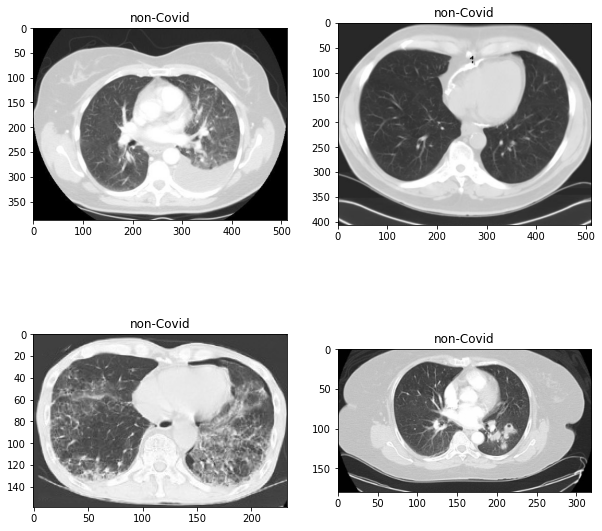

In [22]:
from os import listdir
listdir()
NCovid_train='/content/Train/COVID/NonCovid_CT'
train_images_NC=listdir(NCovid_train)
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(plt.imread(os.path.join(NCovid_train,train_images_NC[i])),cmap='gray')
    plt.title('non-Covid')
plt.show()

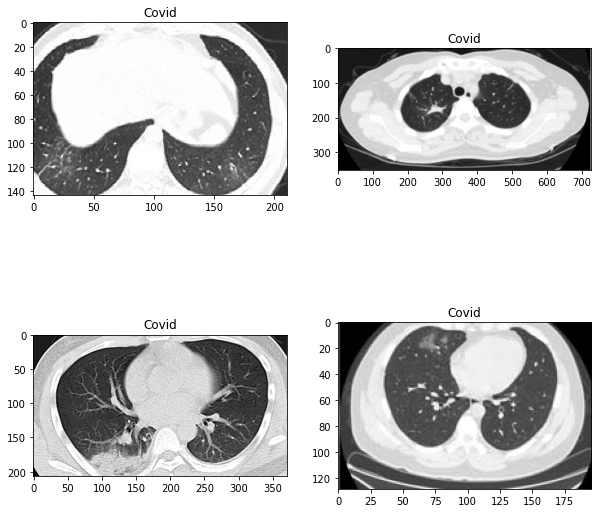

In [23]:
from os import listdir
listdir()
Covid_train='/content/Train/COVID/Covid_CT'
train_images_C=listdir(Covid_train)
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(plt.imread(os.path.join(Covid_train,train_images_C[i])),cmap='gray')
    plt.title('Covid')
plt.show()

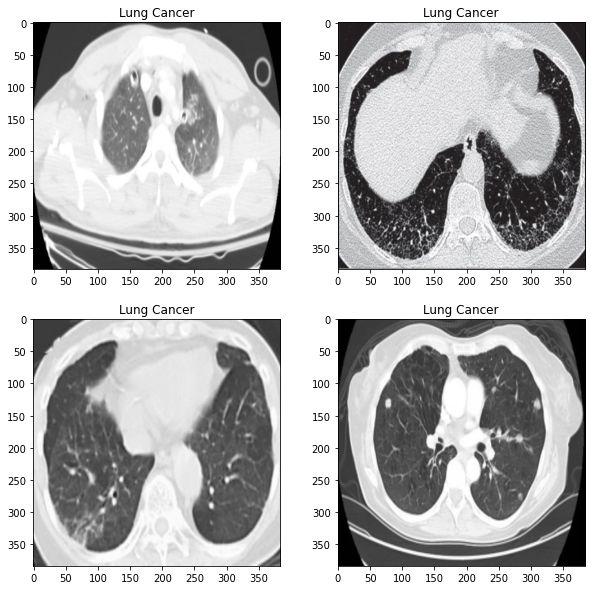

In [24]:
from os import listdir
listdir()
LC_train='/content/Train/LC/LC'
train_images_LC=listdir(LC_train)
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(plt.imread(os.path.join(LC_train,train_images_LC[i])),cmap='gray')
    plt.title('Lung Cancer')
plt.show()


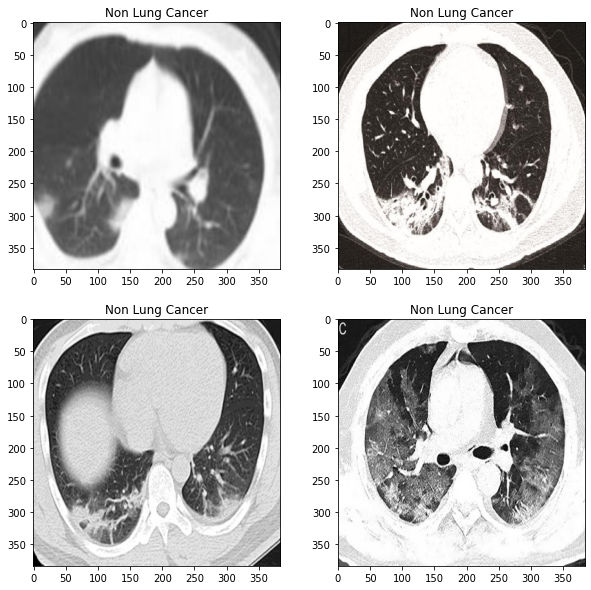

In [25]:
from os import listdir
listdir()
NLC_train='/content/Train/LC/NonLC'
train_images_NLC=listdir(NLC_train)
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(plt.imread(os.path.join(NLC_train,train_images_NLC[i])),cmap='gray')
    plt.title('Non Lung Cancer')
plt.show()

In [33]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(rescale=1/255.0,
        rotation_range=40,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        )

img = plt.imread(os.path.join(NLC_train,train_images_NLC[0]))
x = img_to_array(img)

x = x.reshape((((1,) + x.shape)))

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/gdrive/MyDrive/2021-2/2학기과목/딥러닝/프로젝트/result', save_prefix='covid', save_format='png'):
    i += 1
    if i > 11:
        break

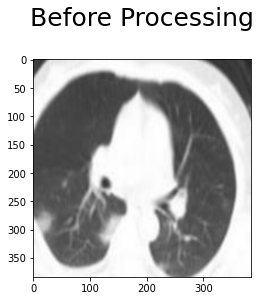

In [34]:
plt.title('Before Processing\n',fontsize=25)
plt.imshow(img)

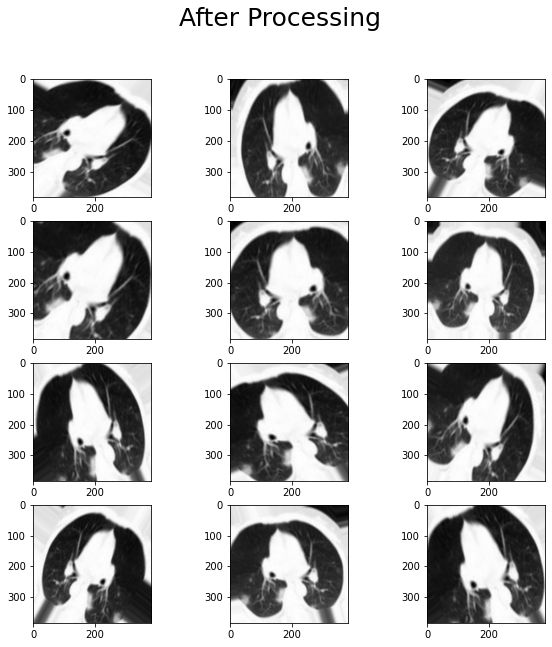

In [35]:
test_image = None
test_image = glob(os.path.join('/content/gdrive/MyDrive/2021-2/2학기과목/딥러닝/프로젝트/result','*.png'))
plt.figure(figsize=(10,10))
plt.suptitle('After Processing',fontsize=25)
for i in range(len(test_image)):
  plt.subplot(4,3,i+1)
  plt.imshow(plt.imread(os.path.join(test_image[i])),cmap='gray')
plt.show()

In [36]:
test_image

['/content/gdrive/MyDrive/2021-2/2학기과목/딥러닝/프로젝트/result/covid_0_7578.png',
 '/content/gdrive/MyDrive/2021-2/2학기과목/딥러닝/프로젝트/result/covid_0_1730.png',
 '/content/gdrive/MyDrive/2021-2/2학기과목/딥러닝/프로젝트/result/covid_0_4803.png',
 '/content/gdrive/MyDrive/2021-2/2학기과목/딥러닝/프로젝트/result/covid_0_4401.png',
 '/content/gdrive/MyDrive/2021-2/2학기과목/딥러닝/프로젝트/result/covid_0_9808.png',
 '/content/gdrive/MyDrive/2021-2/2학기과목/딥러닝/프로젝트/result/covid_0_6733.png',
 '/content/gdrive/MyDrive/2021-2/2학기과목/딥러닝/프로젝트/result/covid_0_4812.png',
 '/content/gdrive/MyDrive/2021-2/2학기과목/딥러닝/프로젝트/result/covid_0_9861.png',
 '/content/gdrive/MyDrive/2021-2/2학기과목/딥러닝/프로젝트/result/covid_0_6332.png',
 '/content/gdrive/MyDrive/2021-2/2학기과목/딥러닝/프로젝트/result/covid_0_4752.png',
 '/content/gdrive/MyDrive/2021-2/2학기과목/딥러닝/프로젝트/result/covid_0_7591.png',
 '/content